# Text annotations for means and medians on a plotnine graphic

We'll start by reading in our dataset. It's a lot of data, so we probably want to add some nice summaries for people to understand what's going on.

In [37]:
import pandas as pd
from plotnine import *

df = pd.read_csv("countries.csv")
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


## Using `after_stat` for text labels

To add a point or line to a chart that represents mean or median, you simply use `stat_summary`. It takes `x` and `y` right out of `aes`.

If you want to label the point, though, it's more difficult. Normally `aes` points to a column, but we want a *calculated point*, the median. It doesn't exist in the dataset! To solve this problem, we use `after_stat`.

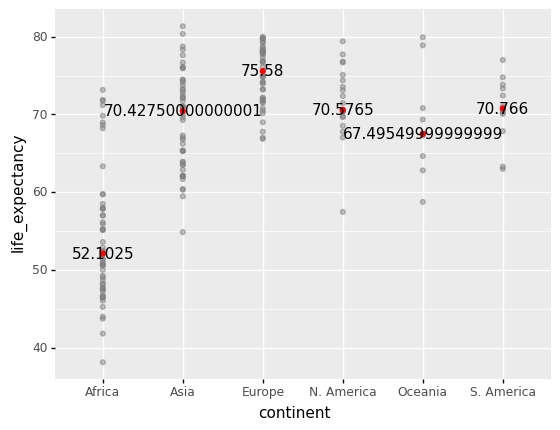

<ggplot: (314219617)>

In [22]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + geom_point(alpha=0.5, color='grey')
    + stat_summary(geom='point', fun_y=np.median, color='red')
    + stat_summary(aes(label=after_stat('y')), geom='text',  fun_y=np.median)
)

Let's break down a few parts of that last line:

* `stat_summary(`: instead of a column, we're plotting a statistical summary
* `label=after_stat('y')`: set the label (the displayed text) to be the y position after we calculate the statistics
* `geom='text'`: instead of a point or line, we want text for each statistical summary
* `fun_y=np.median`: calculate the median!

## Rounding `after_stat` median annotations 

The numbers that come out of `after_stat` look awful, with many numbers after the decimal point. Instead of using the raw numbers, use `after_stat('round(y)')` to round them! And yes, `round` goes *inside of the string*.

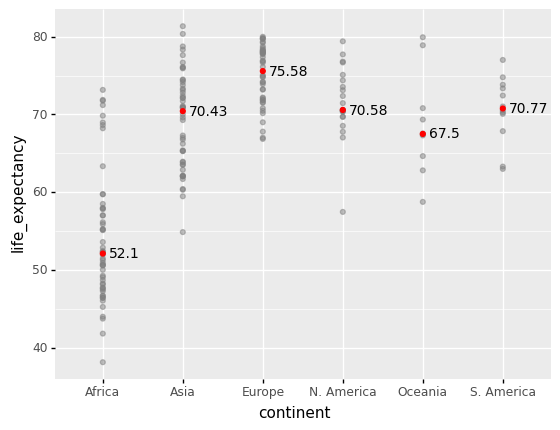

<ggplot: (312551310)>

In [36]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + geom_point(alpha=0.5, color='grey')
    + stat_summary(geom='point', fun_y=np.median, color='red')
    + stat_summary(
        aes(label=after_stat('round(y, 2)')),
        geom='text',
        fun_y=np.median,
        nudge_x=0.075,
        size=10,
        ha='left')
)